# Avaliação de Redes Complexas

Nome:

<hr>

**1 -** (a) Crie o gráfo a seguir usando a biblioteca networkx e mostre o gráfo.<br>
Link para visualizar o grafo: https://commons.wikimedia.org/wiki/File:6n-graf.png<br>

In [1]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

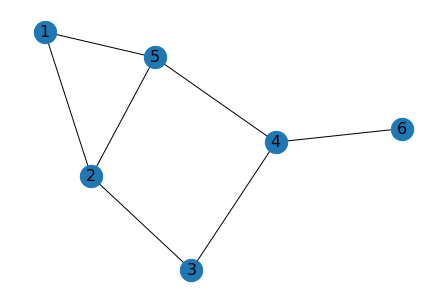

In [2]:
G = nx.Graph()
G.add_node('1')
G.add_node('2')
G.add_node('3')
G.add_node('4')
G.add_node('5')
G.add_node('6')

G.add_edge('1','2')
G.add_edge('1','5')
G.add_edge('2','3')
G.add_edge('2','5')
G.add_edge('3','4')
G.add_edge('4','5')
G.add_edge('4','6')

pos=nx.spring_layout(G)
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

(b) Simule uma caminha aleatória nesse grafo e monte uma matriz onde o elemento Mij representa o número de visitas ao vértice j dado que a caminhada iniciou em i. Considere pelo menos 100 passos. Compare o número de visitas com a medida eigenvector centrality de cada vértice.

Numero de caminhadas entre i e j de tamanho T = (A_ij)ˆT, portanto elevamos A a 100:

In [4]:
A = nx.to_numpy_array(G)
A100 = np.linalg.matrix_power(A, 100)
print(A100)

[[4.79781551e+39 6.00871780e+39 4.28596891e+39 4.87543059e+39
  6.17525666e+39 1.91985107e+39]
 [6.00871780e+39 7.52523522e+39 5.36768802e+39 6.10592205e+39
  7.73380586e+39 2.40439483e+39]
 [4.28596891e+39 5.36768802e+39 3.82872799e+39 4.35530352e+39
  5.51646037e+39 1.71503522e+39]
 [4.87543059e+39 6.10592205e+39 4.35530352e+39 4.95430153e+39
  6.27515459e+39 1.95090869e+39]
 [6.17525666e+39 7.73380586e+39 5.51646037e+39 6.27515459e+39
  7.94815804e+39 2.47103576e+39]
 [1.91985107e+39 2.40439483e+39 1.71503522e+39 1.95090869e+39
  2.47103576e+39 7.68230551e+38]]


Para comparar com a medida de eigenvector centrality, normalizamos a última coluna de A e comparamos com a medida obtida pelo pacote netowrkx:

In [14]:
v = A100[:,5]
v_norm = v / (np.linalg.norm(v) + 1e-16)
v_norm

array([0.40109752, 0.50232897, 0.35830716, 0.40758612, 0.51625167,
       0.16049962])

In [18]:
EC = dict(nx.eigenvector_centrality(G, max_iter = 100))
print('Eigenvetor centrality:', EC)

Eigenvetor centrality: {'1': 0.40109628015120613, '2': 0.5023280877603374, '3': 0.35830784164631824, '4': 0.4075878178953184, '5': 0.516251205914231, '6': 0.16050115266283904}


Vemos que são equivalentes

<hr>

**2 -** (a) Leia a rede do arquivo advogato.txt e mostre a distribuição acumulada complementar do grau, isto é, $P(K > k)$.

In [2]:
G=nx.read_edgelist("data-prova/advogato.txt", nodetype=int)
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)

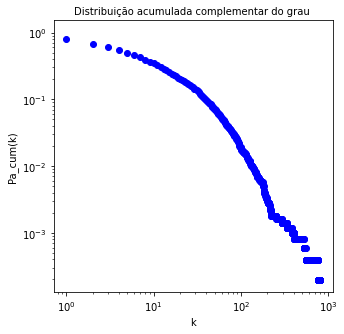

In [3]:
def degree_acum_compl_distribution(G):
    vk = dict(G.degree())
    vk = [v for k,v in vk.items()]
    vk = np.array(vk)
    kvalues= np.arange(0,np.max(vk)+1) 
    Pk = np.zeros(np.max(vk)+1)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) 
    Pk_csum = np.cumsum(Pk)
    Pk_csum_a = 1 - Pk_csum
    return kvalues,Pk, Pk_csum_a
ks, Pk, Pk_csum_a = degree_acum_compl_distribution(G)

plt.figure(figsize=(5,5))
fig = plt.subplot(1,1,1)
fig.set_xscale('log')
fig.set_yscale('log')
plt.plot(ks,Pk_csum_a,'bo')
plt.xlabel("k", fontsize=10)
plt.ylabel("Pa_cum(k)", fontsize=10)
plt.title("Distribuição acumulada complementar do grau ", fontsize=10)
plt.show(True)

(b) Mostre o gráfico de Knn(k), ou seja, o grau médio dos vizinhos dos vértices de grau k em função do grau k.

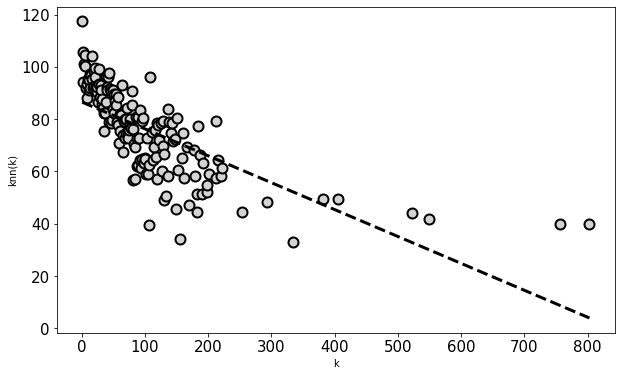

In [4]:
knn = []
for i in G.nodes():
    aux =  nx.average_neighbor_degree(G, nodes = [i])
    knn.append(float(aux[i]))
knn = np.array(knn)
vk = dict(G.degree())
vk = list(vk.values())

knnk = list()
ks = list()
for k in arange(np.min(vk), np.max(vk)+1):
    aux = vk == k
    if(len(knn[aux]) > 0):
        av_knn = mean(knn[aux]) 
        knnk.append(av_knn)
        ks.append(k)
fig= plt.figure(figsize=(10,6))

plt.plot(ks, knnk, '-o', color='gray',markersize=10, linewidth=0,
         markerfacecolor='lightgray',
         markeredgecolor='black',
         markeredgewidth=2)

plt.ylabel("knn(k)")
plt.xlabel("k")

par = np.polyfit(ks, knnk, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = [min(ks), max(ks)]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, '--', linewidth=3, color='black')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show(True)

(c) Calcule a matriz de menores distâncias $D$ a matriz $A^n$, que presenta o número de caminhadas de comprimento $n$ entre cada par de vértices. Faça um gráfico da correlação entre $D_{ij}$ e $A_{ij}$ para diferentes valores de $n$. Ou seja, um gráfico em que o eixo x representa n e o y, a correlação entre essas duas matrizes.

In [5]:
from scipy.stats import pearsonr
N = len(G)
D = zeros(shape=(N,N)) # D is the matrix of distances
vl = []
for i in np.arange(0,N):
    for j in np.arange(i+1, N):
        if(i != j):
            aux = nx.shortest_path(G,i,j)
            dij = len(aux)-1
            D[i][j] = dij
            D[j][i] = dij

In [7]:
A_ = np.linalg.matrix_power(A, i)

In [6]:
A = nx.to_numpy_array(G)
list = []
for i in range(1,20):
    print(i)
    A1 = np.linalg.matrix_power(A, i)
    corr, _ = pearsonr(D, A1)
    list.append((i,corr))

1


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

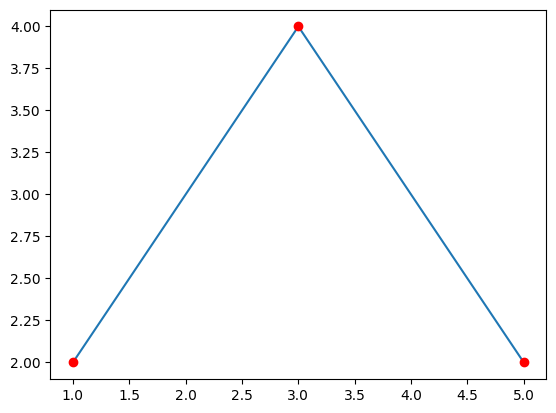

In [ ]:
x_val = [x[0] for x in list]
y_val = [x[1] for x in list]

plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'or')
plt.show()

<hr>

**3 -** Considere a rede do arquivo internet_routers-22july06.gml. Escreva um código que calcule as seguintes medidas: (a) grau médio, (b) transitividade, (c) segundo momento da distribuição do grau, (d) entropia de Shannon da distribuição do grau, (e) coeficiente de assortatividade. Considere apenas o maior componente. Armazene os valoes em uma lista e imprima essa lista, indicando os valores de cada medida. 

In [11]:
G=nx.read_gml("data-prova/internet_routers-22july06.gml")
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)

In [12]:
def momment(G,m):
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M

def shannon_entropy(G):
    _, Pk, _ = degree_acum_compl_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H
    
def medidas(G):
    avg_degree = momment(G,1)
    transitivity = (nx.transitivity(G)) 
    seg_momento = momment(G,2)
    shannon = shannon_entropy(G)
    assortativity = nx.degree_assortativity_coefficient(G)

    H = [avg_degree, transitivity, seg_momento,shannon, assortativity]
    print("Grau médio = ", "%3.4f"%H[0])
    print("Transitividade = ", "%3.4f"%H[1])
    print("Segundo Momento da distr. = ", "%3.4f"%H[2])
    print("Entropia de Shannon = ", "%3.4f"%H[3])
    print("Assortatividade = ", "%3.4f"%H[4])
medidas(G)

Grau médio =  4.2186
Transitividade =  0.0111
Segundo Momento da distr. =  1103.0002
Entropia de Shannon =  2.3658
Assortatividade =  -0.1984


<hr>

**4 -** Simule o modelo de propagação de epidemias SIR na rede de aeroportos dos EUA (USairport_2010.txt). Calcule a correlação de Pearson entre a fração final de recuperados e as seguintes medidas de centralidade: (a) grau, (b) betweenness centrality, (c) eigenvector centrality, (d) closenness centrality. Mostre os resultados e indique a maior correlação. Considere $\beta = 0.6$ e $\mu = 0.1$ no modelo SIR.

In [53]:
G=nx.read_edgelist("data-prova/USairport_2010.txt", nodetype=int)
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)

In [54]:
# function to simulate the SIR dynamics starting from a single seed node
def SIR_single_seed(G, seed, beta=0.3, mu=1):    
    def find(v, i): # function to find the positions of element i in vector v
        l = []
        pos = 0
        for x in v:
            if(x == i):
                l.append(pos)
            pos = pos + 1
        return l

    #Reactive process: SIR dynamics
    seed_node = seed; # seed node
    vector_states = np.zeros(N) # vector that stores the states of the vertices
    vector_states[seed_node] = 1 # vector that stores the states
    ninfected = 1
    t = 0 # start in t= 0 
    infected = list() # this list stores the infected nodes at each step
    vt = list() # this list stores the time step
    vI = list() # this list stores the fraction of infected nodes
    vR = list() # this list stores the fraction of recovered nodes
    vS = list() # this list stores the fraction of susceptible nodes
    # Reactive model simulation
    while ninfected > 0: # Simulate while we can find infected nodes
        infected = find(vector_states,1) # list of infected nodes
        for i in infected: # try to infect the neighbors
            neigs = G.neighbors(i)
            for j in neigs:
                if np.random.rand() < beta:
                    if(vector_states[j] != 2): # verify if the node is not recovered
                        vector_states[j] = 1
        for k in infected: # try to recover the infected nodes
            if np.random.rand() < mu:
                vector_states[k] = 2
        ninfected = len(find(vector_states,1))
        vI.append(ninfected/N)
        vR.append(len(find(vector_states,2))/N)
        vS.append(len(find(vector_states,0))/N)
        t = t + 1
        vt.append(t)
    return vI, vS, vR, vt

In [55]:
# Epidemic parameters
beta = 0.6 # Probability of infection
mu = 0.1  # Probability of recovering
seed = 0
N = len(G) # Number of nodes

vI, vS, vR, vt = SIR_single_seed(G, seed, beta, mu)
    
plt.figure(figsize=(10,5))
plt.plot(vt, vI, 'ro--', label='Infected')
plt.plot(vt, vR, 'bo--', label='Recovered')
plt.plot(vt, vS, 'go--', label='Susceptible')
plt.xlabel("t", fontsize=15)
plt.ylabel("Fraction of nodes", fontsize=15)
plt.legend()
plt.grid(True)
plt.show(True)

TypeError: 'list' object is not callable

In [14]:
B = dict(nx.betweenness_centrality(G))
B = list(B.values())
vk = dict(G.degree())
vk = list(vk.values())

In [ ]:
df = pd.DataFrame({'K':vk,'B':B})
corr = df.corr(method='pearson')
print(corr)

In [17]:
len(vk)

1572

In [16]:
len(B)

1572

<hr>

**5 -** Gere redes do tipo BA, ER e WS (p=0.05) com grau médio igual a 10 e N = 500. Desenvolva um estudo para mostrar que essas apresentam topologias diferentes. (Seja criativ@).

In [8]:
N = 500
av_degree = 10
m = int(av_degree/2)
GBA = nx.barabasi_albert_graph(N, m)

p = av_degree/(N-1)
GER = nx.gnp_random_graph(N, p, seed=None, directed=False)

p = 0.05
GWS = nx.watts_strogatz_graph(N, av_degree, p, seed=None)

In [13]:
print("GBA")
medidas(GBA)
print("------")
print("GER")
medidas(GER)
print("------")
print("GWS")
medidas(GWS)

GBA
Grau médio =  9.9000
Transitividade =  0.0503
Segundo Momento da distr. =  178.3240
Entropia de Shannon =  3.5902
Assortatividade =  -0.0721
------
GER
Grau médio =  9.8040
Transitividade =  0.0185
Segundo Momento da distr. =  104.9720
Entropia de Shannon =  3.5882
Assortatividade =  -0.0066
------
GWS
Grau médio =  10.0000
Transitividade =  0.5747
Segundo Momento da distr. =  100.4680
Entropia de Shannon =  1.4294
Assortatividade =  0.0112
